In [1]:
# Import package 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import linear_model, preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
# For KNN
import pylab as pl
from sklearn import neighbors, datasets
import random

# Explainer notebook 
## Assignment B 
This is the explainer notebook for assignment B in Social Data and Visualization . 

## 1. Motivation 
### What is your dataset?
Our dataset is from the NYC Open Data. It is from the 3-1-1 service requests in New York city. The 3-1-1 service is a special telephone number supported in many communities in the United States. The requests are considerd non-urgent community concerns, as apposed to the well known 9-1-1 number that is an emergency service. 

We looked at the categories of the complaint types and noticed that the complaints are listed with the exact location. The categories are 172 types and we decided to take a better look at the second largest category, residental noise complaints. These residental noise complaints are split up to four categories and will be explored further.

We then want to compare the noise complaints to another dataset that shows the age of residents in each borough. 
### Why did you choose this/these paricual dataset?
New York is often referred to as the City that never sleeps. Inspite of that, noise continous to be the number one quality of life issue. We would like to see if we can help solve that problem. This will be done by answering the following questions:

**What is the quietest place to live in NYC? And how is it connected to the number of residents and their age?** 

We want to see if there is any connection between the age of residents and the number of noise complaints. Then we want to look at the locations of the complaints and see if there are any patterns worth the recognition. This research might help the NYC police department to locate were the different types of complaints are being filed. This could then result in a possible reduction of the the number of noise complaints and help solve the number one quality of life problem in NYC. 

### What was your goal for the end user's experience?
We want the user to be able understand the dataset we chose and the process of how it was done. Then we want the user to be able to visualize the result from the machine learning method.  The visualization should be interactive so they can enjoy the experience of comparing the data themselves and explore it better. 

## 2. Basic stats. Let's understand the dataset better 
### Write about you choise in data cleaning and preprocessing
As we stated in the previous part, the dataset has around 172 complaints types. The steps and choices were the following: 
* Start by looking at all 172 complaint types. Visualized with a bar chart.  
* We made a raw scatter pot of the longtitude and latitudes. There we saw that some complaints were not listed in NY so we filtered them out. 
* Chose the second largest complaint type category; Noise – Residential
* Visualized the number total number of complaints in each Borough and total number of noise complaints in each Borough. 
* “Noise – Residential” has four different Descriptors 
 * Banging/Pounding
 * Loud Music/Party
 * Loud Talking
 * Loud Television
* Then we look at the age data and make a bar chart of the number of residents per Borough. 
* To get a better idea we made a stacked bar plot of the age data. 
* Finally we make dataset for a scatter plot were we can visualize all the following features at the same time:
  * Total number of residents
  * Total number of complaints 
  * Total number of noise complaints 
  
** Note that these steps are then taken in the Notebook here below**

### Write a short section that discuesses the dataset stats. 
Let's take a better look at our datasets. We have two datasets. 
* 311 incident for the year 2015
* Age distribution in New York

The total number of complaints after filtering out the ones not in NYC are 2,047,474 and the total number of Residental noise complaints are 205,826. 
That makes it approximately 10,1% of the total complaints in 2015. 

Here is a list of how the data changed after we had filtered the data and preprocessed it
* From 1.5 MB to 21,257 KB
* From 2,047,474 rows to 205,826 rows
* From 53 variables to 6 variables

The percentage of noise complaints in each borough are then listed below:
* Bronx: 23,9% 
* Brooklyn 30.4% 
* Manhattan 22,7%
* Queens 20,0%
* Staten Island 3,0%

And the number of percentage of residents in each borough are as follows:

* Bronx: 16,9% 
* Brooklyn 31,0% 
* Manhattan 19,2%
* Queens 27,3%
* Staten Island 5,7%

Finally we see the weighted average of the age in each borough:

* Bronx: 35,0 
* Brooklyn 36,3 
* Manhattan 39,1
* Queens 38,1
* Staten Island 38,6


In [2]:
# Start by getting the data for 311 service request from 2015
DataSet = pd.read_csv("311_Service_Requests_from_2015.csv")
DataSet.head()

C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,17,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In the data cleaning process we saw that some of the 311 request were not in New York. So we are going to fillter them out

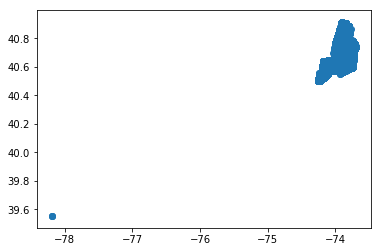

In [3]:
plt.scatter(DataSet["Longitude"], DataSet["Latitude"])
plt.show()

In [4]:
DataSet = DataSet[DataSet["Latitude"] >= 40]
total_complaints = DataSet.count

In [5]:
def getX(Location):
    X1 = Location.split(',')[0]
    X = X1.split('(')[1]
    X = float(X)
    return X
def getY(Locatoin):
    Y1 = Locatoin.split(',')[1]
    Y = Y1.split(')')[0]
    Y = float(Y)
    return Y
    

In [6]:
DataSet['X']= DataSet["Location"].apply(lambda x: getX(x))
DataSet['Y']= DataSet["Location"].apply(lambda y: getY(y))

In [7]:
print DataSet['X'][1] + DataSet['Y'][1]

-33.2124263855


We want to take a closer look at the complaint type. We begin to print out each of the catagories

In [8]:
print "* Complaint Type: ", DataSet["Complaint Type"].unique()

* Complaint Type:  ['Consumer Complaint' 'Vending' 'Blocked Driveway' 'Noise - Commercial'
 'Noise - Street/Sidewalk' 'Root/Sewer/Sidewalk Condition' 'Standing Water'
 'Overgrown Tree/Branches' 'Construction' 'Street Condition'
 'Derelict Vehicle' 'Food Establishment' 'Illegal Parking'
 'Dirty Conditions' 'Illegal Tree Damage' 'Damaged Tree'
 'UNSANITARY CONDITION' 'Rodent' 'Noise - Park' 'Sidewalk Condition'
 'Homeless Encampment' 'Maintenance or Facility' 'HEAT/HOT WATER'
 'Noise - Vehicle' 'Dead Tree' 'ELECTRIC' 'Traffic' 'FLOORING/STAIRS'
 'Broken Muni Meter' 'Taxi Complaint' 'Curb Condition'
 'EAP Inspection - F59' 'Indoor Sewage' 'Indoor Air Quality' 'WATER LEAK'
 'Fire Safety Director - F58' 'PAINT/PLASTER' 'Animal Abuse'
 'Posting Advertisement' 'PLUMBING' 'Street Sign - Dangling' 'DOOR/WINDOW'
 'For Hire Vehicle Complaint' 'APPLIANCE'
 'Missed Collection (All Materials)' 'Sanitation Condition' 'Poison Ivy'
 'Drinking' 'Food Poisoning' 'Street Sign - Missing'
 'Street Sign - Da

That is a lot of catagories, lets try to vizualise this better by looking at total number in each catagory

In [9]:
ComplaintType = DataSet["Complaint Type"].tolist()

TotalComplaint =  []
for i in DataSet["Complaint Type"].unique(): 
    number = ComplaintType.count(i)
    TotalComplaint.append(number)

Df =pd.DataFrame(DataSet["Complaint Type"].unique())   
Df = Df.rename(columns={0: "Complaint Type"})
Df['Total'] = TotalComplaint
Df = Df.sort(['Total'],ascending=True)
Df.tail()



C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Complaint Type,Total
12,Illegal Parking,90862
2,Blocked Driveway,100192
9,Street Condition,118479
171,Noise - Residential,205826
22,HEAT/HOT WATER,225042


We see that the Noise - Residential is the second biggest category. We want to investigate him better. First we are going to make a plot that plots the total number of requests in each catagory. For better visulazation we are going to color the Noice complaint red. 

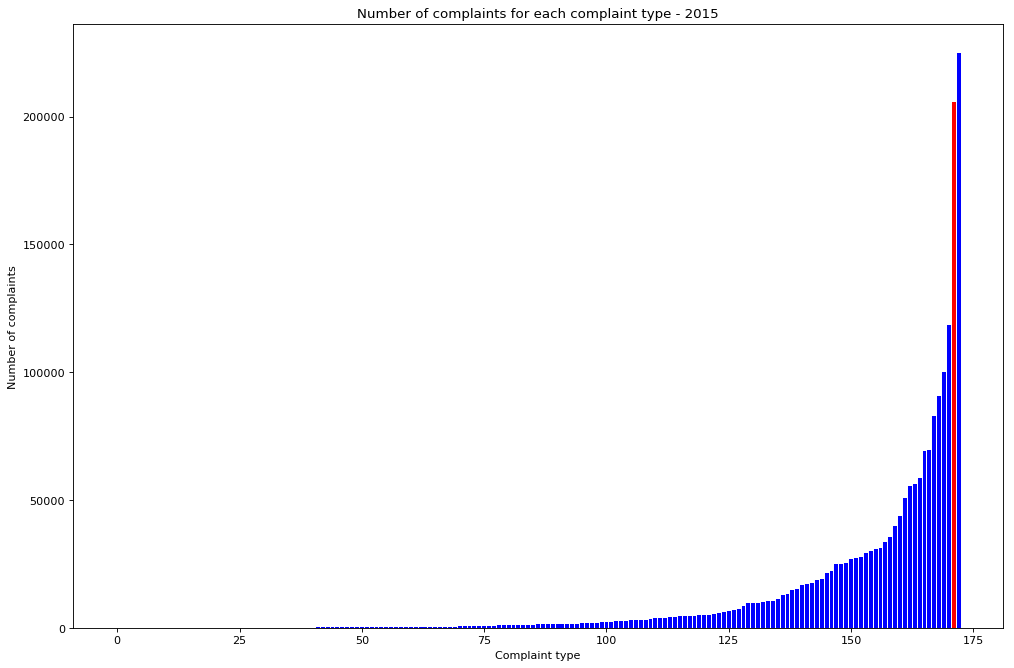

In [10]:
# Function that append the color red to the catagory Noise-Residential. 
def Color(Descriptor):
    if Descriptor == "Noise - Residential":
        return 'Red'    
    else:
        return 'Blue'

Df['Color']= Df['Complaint Type'].apply(lambda x: Color(x))
Df.to_csv('ComplaintTypeTotal.csv')

# Make a plot
y = [i  for i, _ in enumerate(TotalComplaint)]
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y, Df['Total'], color = Df['Color'])
plt.title('Number of complaints for each complaint type - 2015')
plt.xlabel('Complaint type')
plt.ylabel('Number of complaints')
plt.savefig('Total_complaints.png', bbox_inches='tight')
plt.show()


Now we want to make a subset of our dataset that only contains information about noise complaints

In [11]:
Noise_df = DataSet.filter(items = ["Created Date", "Complaint Type", "Descriptor", "Borough", "Latitude", "Longitude"])
Noise_df = Noise_df[Noise_df["Complaint Type"] == "Noise - Residential"]
Total_noise = Noise_df.count
Noise_df.to_csv('Noise_total.csv')
Noise_df.head()

,Created Date,Complaint Type,Descriptor,Borough,Latitude,Longitude
2012903,01/01/2015 01:35:01 AM,Noise - Residential,Banging/Pounding,BRONX,40.842477,-73.852270
2012904,01/01/2015 12:31:58 AM,Noise - Residential,Loud Music/Party,QUEENS,40.724593,-73.752675
2012905,01/01/2015 02:13:23 AM,Noise - Residential,Loud Music/Party,QUEENS,40.738833,-73.862756
2012906,01/01/2015 12:55:07 AM,Noise - Residential,Banging/Pounding,STATEN ISLAND,40.581880,-74.156985
2012907,01/01/2015 12:29:52 AM,Noise - Residential,Banging/Pounding,QUEENS,40.739168,-73.763606


We want to see if we can see some conection between the borough and the noise complaints. Lets count the total number of noise complaints in each borough. We are going to compare that to total number of complaints in each borough so we will plot that as well. 

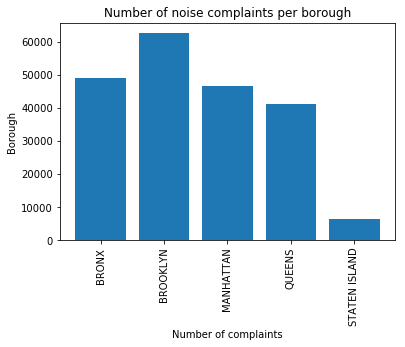

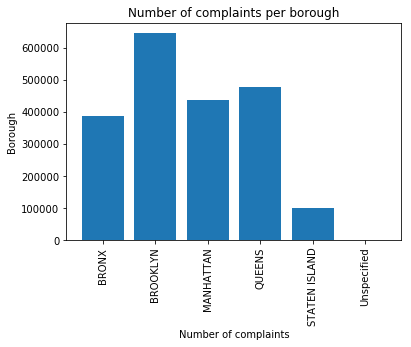

In [12]:
Total_Df_TypeBorough = Noise_df.filter(items = ['Complaint Type', 'Borough']).groupby(['Borough']).count()
Borough = Total_Df_TypeBorough.index

plt.bar(range(0,5),Total_Df_TypeBorough['Complaint Type'])
plt.xticks([i  for i, _ in enumerate(Borough)],Borough, rotation='vertical')
plt.title('Number of noise complaints per borough')
plt.xlabel('Number of complaints')
plt.ylabel('Borough')
plt.show()

Total_Df = DataSet.filter(items = ['Complaint Type', 'Borough']).groupby(['Borough']).count()
Borough = Total_Df.index

plt.bar(range(0,6),Total_Df['Complaint Type'])
plt.xticks([i  for i, _ in enumerate(Borough)],Borough, rotation='vertical')
plt.title('Number of complaints per borough')
plt.xlabel('Number of complaints')
plt.ylabel('Borough')
plt.show()

In [13]:
print Borough
print Total_Df_TypeBorough['Complaint Type']

Index([u'BRONX', u'BROOKLYN', u'MANHATTAN', u'QUEENS', u'STATEN ISLAND',
       u'Unspecified'],
      dtype='object', name=u'Borough')
Borough
BRONX            49144
BROOKLYN         62620
MANHATTAN        46668
QUEENS           41162
STATEN ISLAND     6232
Name: Complaint Type, dtype: int64


These bar chart look pretty similar, but there is some different. 

The noise complaint can be divided into four different categories based on the "Descriptor" column. We want to take a better look at that. 

In [14]:
print "* ¨Noise complaint type: ", Noise_df["Descriptor"].unique()

* ¨Noise complaint type:  ['Banging/Pounding' 'Loud Music/Party' 'Loud Talking' 'Loud Television']


Let's take a look of total number of complaints in each complaint type. 

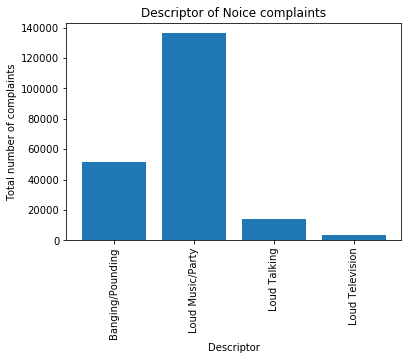

In [15]:
ComplaintTypeTotal = Noise_df.filter(items = ["Complaint Type",'Descriptor']).groupby("Descriptor").count()

y = [i  for i, _ in enumerate(ComplaintTypeTotal["Complaint Type"])]

ComplaintTypeTotal.to_csv('NoiceComplaintDescriptor.csv')

plt.bar(y, ComplaintTypeTotal["Complaint Type"])
Type = list(ComplaintTypeTotal.index)
plt.xticks([i  for i, _ in enumerate(Type)],Type, rotation='vertical')
plt.title('Descriptor of Noice complaints')
plt.xlabel('Descriptor')
plt.ylabel('Total number of complaints')
plt.show()


We also want to look at how the age distribution is in New York. Lets begin to look at the total number of resident in each borough.

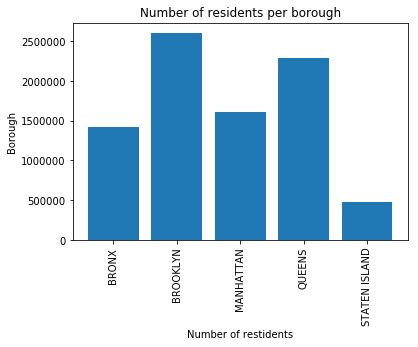

In [16]:
DataSet_Age = pd.read_csv("Projected_Population_2010-2040.csv")
Age_Borough_Total = DataSet_Age.filter(items = ['Borough', '2015'])[DataSet_Age["Age"] == 'Total']
df = Age_Borough_Total.drop(16)

plt.bar(range(0,5),df['2015'])
plt.xticks([i  for i, _ in enumerate(Borough[0:5])],Borough, rotation='vertical')
plt.title('Number of residents per borough')
plt.xlabel('Number of restidents')
plt.ylabel('Borough')
plt.show()


To get a better view of the age distribution we are going to make a stacked bar chart. We begin to get the age distribution for each borough

In [17]:
Age_Borough_BRONX = DataSet_Age[(DataSet_Age["Borough"] == 'Bronx') & (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_BRONX = Age_Borough_BRONX.sort_values(by = 'Age')
Age_Borough  = Age_Borough_BRONX.reset_index(drop=True)

Age_Borough_BRONX = DataSet_Age[(DataSet_Age["Borough"] == 'Bronx') & (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_BRONX = Age_Borough_BRONX.sort_values(by = 'Age').reset_index(drop=True)

Age_Borough_BROOKLYN = DataSet_Age[(DataSet_Age["Borough"] == 'Brooklyn')& (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_BROOKLYN = Age_Borough_BROOKLYN.sort_values(by = 'Age').reset_index(drop=True)


Age_Borough_MANHATTAN = DataSet_Age[(DataSet_Age["Borough"] == 'Manhattan') & (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_MANHATTAN = Age_Borough_MANHATTAN.sort_values(by = 'Age').reset_index(drop=True)


Age_Borough_QUEENS = DataSet_Age[(DataSet_Age["Borough"] == 'Queens') & (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_QUEENS = Age_Borough_QUEENS.sort_values(by = 'Age').reset_index(drop=True)


Age_Borough_STATEN_ISLAND = DataSet_Age[(DataSet_Age["Borough"] == 'Staten Island') & (DataSet_Age['Age'] != 'Total')].filter(items = ['Age', '2015'])
Age_Borough_STATEN_ISLAND = Age_Borough_STATEN_ISLAND.sort_values(by = 'Age').reset_index(drop=True)

Age = Age_Borough_BRONX['Age']

In [18]:
Age_Borough['BROOKLYN'] = Age_Borough_BROOKLYN['2015']
Age_Borough['MANHATTAN'] = Age_Borough_MANHATTAN['2015']
Age_Borough['QUEENS'] = Age_Borough_QUEENS['2015']
Age_Borough['STATEN_ISLAND'] = Age_Borough_STATEN_ISLAND['2015']
Age_Borough.rename(columns={'2015': 'BRONX'}, inplace=True)



We made the function age_order to get age distribution in the right order

In [19]:
def age_order(NumberPerAge):
    age_in_order = list()
    index_new = [0, 9, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17]
    for i in index_new:
        RightOrder = NumberPerAge[i]
        age_in_order.append(RightOrder)
    return age_in_order  

BRONX_list_age = age_order(Age_Borough_BRONX['2015'])
QUEENS_list_age = age_order(Age_Borough_QUEENS['2015'])
MANHATTAN_list_age = age_order(Age_Borough_MANHATTAN['2015'])
BROOKLYN_list_age = age_order(Age_Borough_BROOKLYN['2015'])
STATEN_ISLAND_list_age = age_order(Age_Borough_STATEN_ISLAND['2015'])
Age = age_order(Age) 

To make bar plot we need to define where the bar should start, we made the function bar_bottom to compute the right posistion for each borough

In [20]:
def bar_bottom(list1,list2):
    bottom_pos = list()
    for i in range(0,18):
        plus = list1[i] + list2[i]
        bottom_pos.append(plus)
    return bottom_pos

pos1 = bar_bottom(BRONX_list_age,QUEENS_list_age)
pos2 = bar_bottom(pos1, MANHATTAN_list_age)
pos3  = bar_bottom(pos2, BROOKLYN_list_age)

Now we are finaly ready to make this fabulous stacked bar plot

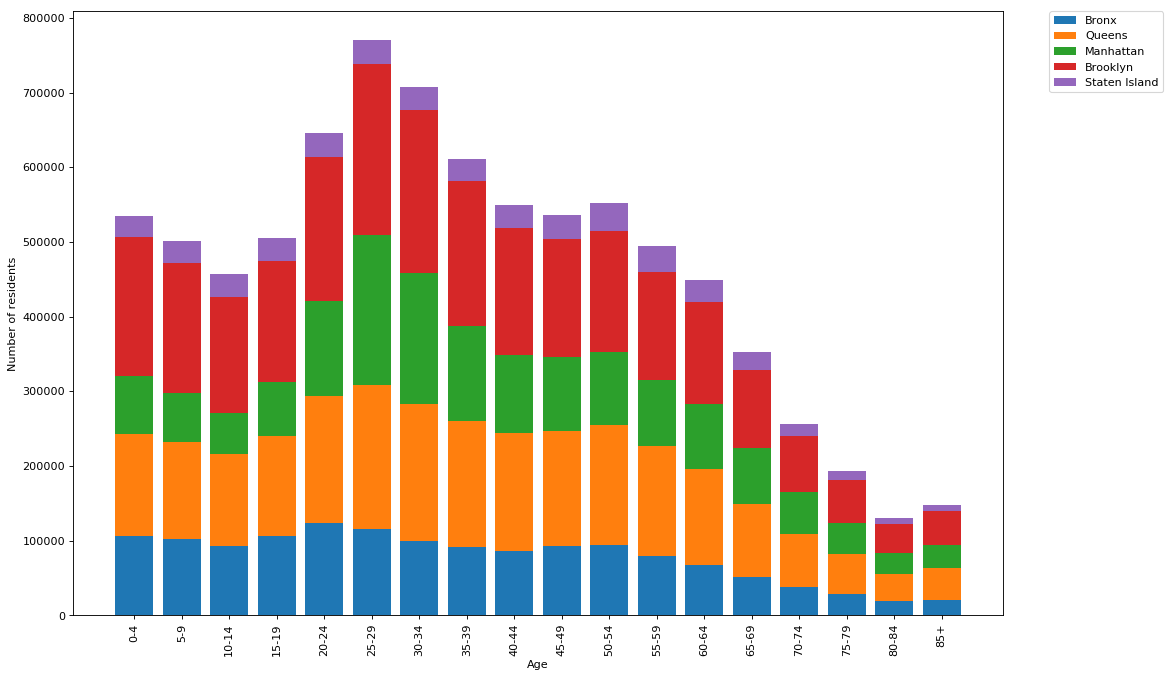

In [21]:
x = [i  for i, _ in enumerate(Age)]
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
p1 = plt.bar(x, BRONX_list_age, label = "Bronx")          # bottom = 0
p2 = plt.bar(x, QUEENS_list_age, bottom = BRONX_list_age, label = "Queens")     # bottom = BRONX
p3 = plt.bar(x, MANHATTAN_list_age, bottom = pos1, label = "Manhattan")        # bottom = BRONX + QUEENS
p3 = plt.bar(x, BROOKLYN_list_age, bottom = pos2, label = "Brooklyn")          # bottom = BRONX + QUEENS + MANHATTAN
p3 = plt.bar(x, STATEN_ISLAND_list_age, bottom = pos3, label = "Staten Island")     # bottom = BRONX + QUEENS + MANHATTAN + BROOKLYN


plt.xticks([i  for i, _ in enumerate(Age)],Age, rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Age")
plt.ylabel("Number of residents")
#plt.title("Number of residents in each age group")
plt.savefig('Age_NewYork', bbox_inches='tight')
plt.show()

Now we want to make a scatter plot to see the numer of residents, total numer of noise complaints and total number of compalaints. The plot is going to have number of noise complaint on the yaxis, total number of complaint on xaxis and the radius of the scatter is going to represent total number of residents in each borough.

In [22]:
Scatter_data = Noise_df.filter(items = ['Complaint Type', 'Borough']).groupby(['Borough']).count()
Scatter_data["Total2015"] = DataSet.filter(items = ['Complaint Type', 'Borough']).groupby(['Borough']).count()
Scatter_data["Borough"] = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STAEN ISLAND']

Scatter_data = Scatter_data.reset_index(drop = True)

TotalNumberRes = DataSet_Age[(DataSet_Age['Age'] == 'Total') & (DataSet_Age["Borough"] != 'NYC Total')].filter(items = ['Age', 'Borough', '2015', '2010'])
TotalNumberRes = TotalNumberRes.reset_index(drop = True)
Scatter_data["NumRes2015"] = TotalNumberRes['2015']
Scatter_data["NumRes2010"] = TotalNumberRes['2010']
Scatter_data.head()



,Complaint Type,Total2015,Borough,NumRes2015,NumRes2010
0,49144,385635,BRONX,1415725,1385108
1,62620,645889,BROOKLYN,2602844,2552911
2,46668,437244,MANHATTAN,1610697,1585873
3,41162,477913,QUEENS,2289489,2250002
4,6232,100779,STAEN ISLAND,478359,468730


## 3. Theory. Which theoretical tools did you use?
### Describe which machine learning tools you use and why the tools you've chosen are right for the problem you are solving
The machine learning tools we chose were K-Means Clustering and K-Nearest neighbor.
#### K-means Clustering 
We chose this tool since it shows us how the noise complaints are spread over NYC. This will help us to estimate were the most complaints are filed for each Descriptor. For different types we can both compare the location of the centers and how it changes when choosing different number of centers. If the centers are close together it indicates that a lot of the complaints are filed in the same area. 
Note that the data for all the points was very large, since the noise complaints are numerous. To prevent the points on the map from lagging to much we remove all the duplicates that are the same color in the same point. 
#### K nearest neighbor 
The KNN will help us see where which category of noise complaint is the most problematic. Each prediction point is classified according to its nearest neighbor. The data could help the police to prevent these noise complaints by knowing where the type of noise complaint is the most. This also helps us to understand where each descriptor is dominant in each area. 
We chose to do both for balanced and unbalance data. 
The unbalanced data will make the algorithm classify an instance from a minority class as one from a majority class. It is interesting to investigate real spatial and temporal complaints probabilities. For example, the noise complaint descriptor Loud Music/Party has the highest number of complaints, so we expect to get far more predictions being influenced from that categories than for example from the Loud Television descriptor.
The balanced data is proportional to each noise complaint type. This will be useful when seeing which data is more spread. The map where the data is balanced to occurrences shows the police what type of complaint at a particular altitude (or point) is most likely to occur.  
The method was made for the KNeighborsClassifier to be 3, 15 and 30. 

### Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?
### Explain the model performance. How did you measure it? Are your result what you expected?
The answers can be found below

## Clustering: 
Now we will do clustering to see how the distribuition between noise complaints types are. 
We want to make a dataset for include only the longitude and latitude for each type of noise complaint

In [23]:
DataSet_Cluster_Noise = DataSet[DataSet["Complaint Type"] == "Noise - Residential"]
DataSet_Cluster_Noise = DataSet_Cluster_Noise.rename(columns={'X': 'Y', 'Y': 'X'})
DataSet_cluster = DataSet_Cluster_Noise.filter(items = ["X", "Y", "Descriptor" ])
DataSet_cluster_Bang = DataSet_cluster[DataSet_cluster["Descriptor"]== "Banging/Pounding"].filter(items = ["X", "Y"])
DataSet_cluster_Music = DataSet_cluster[DataSet_cluster["Descriptor"]== "Loud Music/Party"].filter(items = ["X", "Y"])
DataSet_cluster_Talking = DataSet_cluster[DataSet_cluster["Descriptor"]== "Loud Talking"].filter(items = ["X", "Y"])
DataSet_cluster_TV = DataSet_cluster[DataSet_cluster["Descriptor"]== "Loud Television"].filter(items = ["X", "Y"])

In [24]:
DataSet_cluster_Bang.head()

,X,Y
2012903,-73.852270,40.842477
2012906,-74.156985,40.581880
2012907,-73.763606,40.739168
2012908,-73.933625,40.759398
2012945,-73.941066,40.704771


Lets plot this to see if everything looks fine

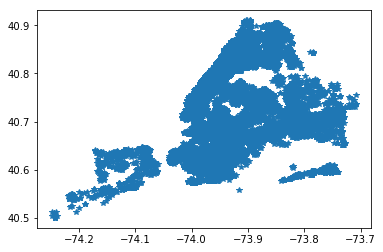

In [25]:
plt.plot(DataSet_cluster_Bang['X'], DataSet_cluster_Bang['Y'], '*')
plt.show()


This looks good so no we will do the clustering. We will use *fit* and *labels_* from KMeans to find out in what each point should be in. Because we have four different dataset we are going to do the clustering we make a function that does the clustering part for us.

In [26]:
def KMeanDataSet(DataSet):
    DataSet_func = DataSet
    zip_X_Y = zip(DataSet_func['X'], DataSet_func['Y'])
    kmeans = []
    for i in xrange(2,7,1):
        kmeans.append(KMeans(n_clusters=i).fit(zip_X_Y))

    DataSet_func['KMean2'] = kmeans[0].labels_
    DataSet_func['KMean3'] = kmeans[1].labels_
    DataSet_func['KMean4'] = kmeans[2].labels_
    DataSet_func['KMean5'] = kmeans[3].labels_
    DataSet_func['KMean6'] = kmeans[4].labels_
    
    return DataSet_func

# --------------------------------------------------------------------------

def KMeanVector(DataSet):
    DataSet_func = DataSet
    zip_X_Y = zip(DataSet_func['X'], DataSet_func['Y'])
    kmeans = []
    for i in xrange(2,7,1):
        kmeans.append(KMeans(n_clusters=i).fit(zip_X_Y))
    return kmeans

In [27]:
Clustering_Bang= KMeanDataSet(DataSet_cluster_Bang)
kmeans_Bang = KMeanVector(DataSet_cluster_Bang)
Clustering_Music = KMeanDataSet(DataSet_cluster_Music)
kmeans_Music = KMeanVector(DataSet_cluster_Music)
Clustering_Talking = KMeanDataSet(DataSet_cluster_Talking)
kmeans_Talking = KMeanVector(DataSet_cluster_Talking)
Clustering_TV = KMeanDataSet(DataSet_cluster_TV)
kmeans_TV = KMeanVector(DataSet_cluster_TV)

In [28]:
Clustering_Bang_drop = Clustering_Bang.drop_duplicates()
Clustering_Music_drop = Clustering_Music.drop_duplicates()
Clustering_Talking_drop = Clustering_Talking.drop_duplicates()
Clustering_TV_drop = Clustering_TV.drop_duplicates()

In [29]:
print "bang", len(Clustering_Bang)-len(Clustering_Bang_drop)
print "musik", len(Clustering_Music)-len(Clustering_Music_drop)
print "talk", len(Clustering_Talking)-len(Clustering_Talking_drop)
print "tv", len(Clustering_TV)-len(Clustering_TV_drop)

bang 37259
musik 88123
talk 6185
tv 2233


Lets plot the data to see if everything looks fine

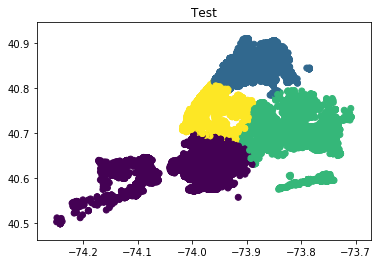

In [30]:
plt.scatter(Clustering_Bang['X'], Clustering_Bang['Y'], c=Clustering_Bang["KMean4"])
plt.title("Test")
plt.show()


Everything looks good so we will make a csv file with our data frame

In [31]:
Clustering_Bang.to_csv('Clustering_Bang.csv')
Clustering_Music.to_csv('Clustering_Music.csv')
Clustering_Talking.to_csv('Clustering_Talking.csv')
Clustering_TV.to_csv('Clustering_TV.csv')


In [32]:
len(Clustering_Bang)


51832

Now we will get the location of the cluster **center** and put it into a csv file. We will start by defening a function, **CenterLocation**, that gets the center location and right color. 

In [33]:
def CenterLocation(kmeans):
    Center_Location = []
    for i in range(len(kmeans)):
        Center_Location.append(kmeans[i].cluster_centers_.tolist())  
        
    # We will make a dataframe with the loacation    
    X_center = [[] for x in xrange(5)]
    Y_center = [[] for x in xrange(5)]

    for i in range(len(Center_Location[:5])):
        X_center[i] = [x[0] for x in Center_Location[i]]
        Y_center[i] = [x[1] for x in Center_Location[i]]
    
    Centers = {'X_KMean2' : pd.Series(X_center[0], index=['1', '2']), 'Y_KMean2' : pd.Series(Y_center[0], index=['1', '2']), 'X_KMean3' : pd.Series(X_center[1], index=['1', '2', '3']), 'Y_KMean3' : pd.Series(Y_center[1], index=['1', '2', '3']), 'X_KMean4' : pd.Series(X_center[2], index=['1', '2', '3', '4']), 'Y_KMean4' : pd.Series(Y_center[2], index=['1', '2', '3', '4']), 'X_KMean5' : pd.Series(X_center[3], index=['1', '2', '3', '4', '5']), 'Y_KMean5' : pd.Series(Y_center[3], index=['1', '2', '3', '4', '5']), 'X_KMean6' : pd.Series(X_center[4], index=['1', '2', '3', '4', '5', '6']), 'Y_KMean6' : pd.Series(Y_center[4], index=['1', '2', '3', '4', '5', '6'])}

    dfCenters = pd.DataFrame(Centers)
    dfCenters.head()
    
    # To color the centers in the same color as the location point we add a color column to our data frame
    dfCenters['Color_KMean2'] = [0,1,1,1,1,1]
    dfCenters['Color_KMean3'] = [0,2,1,1,1,1]
    dfCenters['Color_KMean4'] = [3,2,1,0,0,0]
    dfCenters['Color_KMean5'] = [0,1,3,4,2,2]
    dfCenters['Color_KMean6'] = [2,1,0,3,4,5]
    
    return dfCenters



Now we will get the center with the new function and save the data in a CSV file.

In [34]:
Center_Bang = CenterLocation(kmeans_Bang)
Center_Bang.to_csv('Center_Bang.csv')
Center_Music = CenterLocation(kmeans_Music)
Center_Music.to_csv('Center_Music.csv')
Center_Talking = CenterLocation(kmeans_Talking)
Center_Talking.to_csv('Center_Talking.csv')
Center_TV = CenterLocation(kmeans_TV)
Center_TV.to_csv('Center_TV.csv')


In [35]:
Center_Bang.head()

,X_KMean2,X_KMean3,X_KMean4,X_KMean5,X_KMean6,Y_KMean2,Y_KMean3,Y_KMean4,Y_KMean5,Y_KMean6,Color_KMean2,Color_KMean3,Color_KMean4,Color_KMean5,Color_KMean6
1,-73.898416,-73.845666,-73.957409,-74.019786,-73.832033,40.810612,40.710287,40.746014,40.606489,40.713587,0,0,3,0,2
2,-73.961799,-73.977755,-73.979818,-73.892730,-73.886613,40.660479,40.659930,40.634616,40.852062,40.855933,1,2,2,1,1
3,NaN,-73.913660,-73.837575,-73.827829,-73.956387,NaN,40.830755,40.707008,40.713461,40.633865,1,1,1,3,0
4,NaN,NaN,-73.903822,-73.946606,-73.938790,NaN,NaN,40.844347,40.790187,40.808129,1,1,0,4,3
5,NaN,NaN,NaN,-73.952114,-74.094497,NaN,NaN,NaN,40.675162,40.610387,1,1,0,2,4


## KNN: 
Now we will do KNN analysis to see how the distribuition between noise complaints types are. 
We use the dataset we made earlier called Noise_df. We wil make focus on the three largest Descriptors:
* Banging/Pounding
* Loud Music/Party
* Loud Talking

In [36]:
# The type of niose complaints we want to explore
focusComplaint = ['Banging/Pounding', 'Loud Music/Party', 'Loud Talking']
# The length of the dataset
length_noise = len(Noise_df)
print "The number of noise complaints in 2015: ", length_noise

The number of noise complaints in 2015:  205826


Then we calculate the length of each focus complaint and check which one has the least number of complaints.

In [37]:
# Calculate the number of each focus complaint.
length = []
for i in range(3):
    length.append(sum(Noise_df["Descriptor"] == focusComplaint[i]))
    print "The number of %s is %d" %(focusComplaint[i],length[i])

# Find the minimum lenth of focuscrimes
min_noise_compl = min(length)
print min_noise_compl

The number of Banging/Pounding is 51832
The number of Loud Music/Party is 136290
The number of Loud Talking is 13922
13922


In [38]:
# change the index
Noise_df = Noise_df.reset_index(drop=True)

Then we set the data on the right form with numbering 0,1,2 to be able to execute the **K nearest neighbour**. We will be implementig the method on both **Unbalanced** data and **Balanced**. 

In [39]:
# Initialize vectors for the longtitude and latitude
X = []
XBang = []
XMusic = []
XTalk = []

# Initialize vectors for the numbering; 0,1,2
Y = []
Yrand = []

# Initialize the counter
i = 0

# Get the data for Prostitution crimes
for i in range(length_noise):
    if Noise_df["Descriptor"][i] == 'Banging/Pounding':
        X.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        XBang.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        Y.append(0)
    if Noise_df["Descriptor"][i] == 'Loud Music/Party':
        X.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        XMusic.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        Y.append(1)
    if Noise_df["Descriptor"][i] == 'Loud Talking' :
        X.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        XTalk.append([float(Noise_df['Longitude'][i]),float(Noise_df['Latitude'][i])])
        Y.append(2)
            

# Make the dataset 'balanced' by choosing randomly equal number of crimes 
XBang_rand = random.sample(XBang,min_noise_compl)
XMusic_rand = random.sample(XMusic,min_noise_compl)
XTalk_rand = random.sample(XTalk,min_noise_compl)

# Make the Yrand array same size as Xrand 
Yrand = [0]*min_noise_compl + [1]*min_noise_compl + [2]*min_noise_compl
Xrand = XBang_rand + XMusic_rand + XTalk_rand

# Set as arrays
Xrand = np.array(Xrand)
Yrand = np.array(Yrand)
X = np.array(X)
Y = np.array(Y)

The function predictknn is then made. The n represente the *KNeighborsclassifier*, X is the altitude of the points and Y is the numbering vector. 

In [40]:
# Make a function that makes knn prediction and plots the outcome
def predictknn(X,Y,n):
    
    # Find the max and min of the latitude(y) and the longtitude(x)
    x_min, x_max = X[:,0].min() , X[:,0].max() 
    y_min, y_max = X[:,1].min() , X[:,1].max() 
    
    # Set the step size in the mesh
    h = 0.01 
    # Set the KNeighborsClassifier to n
    knn=neighbors.KNeighborsClassifier(n_neighbors = n)
    # Create an instance of Neighbours Classifier and fit the data.
    knn.fit(X, Y)

    # Make a grid over the area 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # The predictions
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Initialize altitudes for each crime
    banglon=[]
    banglat=[]
    
    # Set the x and y vectors of the grid
    x = xx.ravel()
    y = yy.ravel()
    
    # create for the dataframe
    knn_df = {"X": x, "Y": y}
                
    return Z, x, y, knn_df

### Balanced 
Then we call the function predictknn for n = 3, 15 and 30 and use the balanced data

In [41]:
# Use the function predictknn to find the balanced predictions
# For n = 3
n3 = 3
Zrand3, xrand3, yrand3, knn_df3_rand = predictknn(Xrand,Yrand, n3)

# For n = 15
n15 = 15
Zrand15, xrand15, yrand15, knn_df15_rand = predictknn(Xrand,Yrand, n15)

# For n = 30
n30 = 30
Zrand30, xrand30, yrand30, knn_df30_rand = predictknn(Xrand,Yrand, n30)

In [42]:
# make all the altitudes to a dataset
knnbalance_df3 = pd.DataFrame(knn_df3_rand)
knnbalance_df15 = pd.DataFrame(knn_df15_rand)
knnbalance_df30 = pd.DataFrame(knn_df30_rand)

In [43]:
# Make a dataset for the balanced data
knnbalance_df = pd.DataFrame(knn_df3_rand)
knnbalance_df.head()

,X,Y
0,-74.250349,40.49944
1,-74.240349,40.49944
2,-74.230349,40.49944
3,-74.220349,40.49944
4,-74.210349,40.49944


Make a dataset for the KNN prediction for the balanced data:

In [44]:
# include the Z values to set each point 0,1 or 2
knnbalance_df['Z3'] = Zrand3
knnbalance_df['Z15'] = Zrand15
knnbalance_df['Z30'] = Zrand30


knnbalance_df.to_csv('knn_balance.csv')

knnbalance_df.head()

,X,Y,Z3,Z15,Z30
0,-74.250349,40.49944,0,2,2
1,-74.240349,40.49944,0,2,2
2,-74.230349,40.49944,0,2,2
3,-74.220349,40.49944,1,2,2
4,-74.210349,40.49944,2,2,2


### Unbalanced 
Then we call the function predictknn for n = 3, 15 and 30 and use the unbalanced data

In [45]:
# Use the function predictknn to find the unbalanced predictions
# For n = 3
n3 = 3
Z3, x3, y3, knn_df3 = predictknn(X,Y, n3)

# For n = 15
n15 = 15
Z15, x15, y15, knn_df15 = predictknn(X,Y, n15)

# For n = 30
n30 = 30
Z30, x30, y30, knn_df30 = predictknn(X,Y, n30)

In [46]:
# make all the altitudes to a dataset
knn_df3 = pd.DataFrame(knn_df3)
knn_df15 = pd.DataFrame(knn_df15)
knn_df30 = pd.DataFrame(knn_df30)

In [47]:
# Make a dataset for the unbalanced data
knn_df = pd.DataFrame(knn_df3)
knn_df.head()

,X,Y
0,-74.251277,40.499423
1,-74.241277,40.499423
2,-74.231277,40.499423
3,-74.221277,40.499423
4,-74.211277,40.499423


Make a dataset for the KNN prediction for the unbalanced data:

In [48]:
# include the Z values to set each point 0,1 or 2
knn_df['Z3'] = Z3
knn_df['Z15'] = Z15
knn_df['Z30'] = Z30

knn_df.to_csv('knn_unbalance.csv')

knn_df.head()

,X,Y,Z3,Z15,Z30
0,-74.251277,40.499423,1,0,1
1,-74.241277,40.499423,0,0,0
2,-74.231277,40.499423,1,2,0
3,-74.221277,40.499423,1,1,1
4,-74.211277,40.499423,1,1,1


Make a scatter plot to see if the map worked

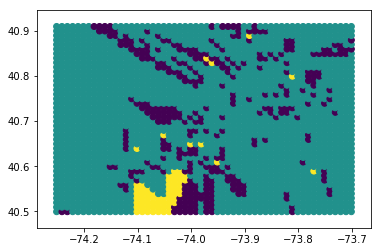

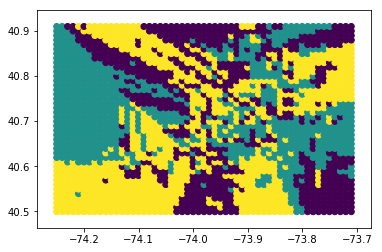

In [49]:
plt.scatter(knn_df['X'], knn_df['Y'], c=knn_df["Z30"])
plt.show()

plt.scatter(knnbalance_df['X'], knnbalance_df['Y'], c=knnbalance_df["Z30"])
plt.show()

## Validation of the model

To validate our model we made a train data set and a test data set with the function train_test_split function from sklearn.cross_validation, we decided to split the data into 20% train data and 80% test data.  We did clustering method for both the train and test data and compered the error of the center points for K = 2,..,6.  We did this for all our four noise complaint categories, an error plot can be seen in the notebook below. The plot shows that the error is similar for all the categories expect we get a low error for the banging category, which could be because we have a lot of data points for that category. 
We are pretty pleased with an error of 0.2 when only using 20% of our dataset, so we think the clustering method gives us a good representation of the distribution of noise complaints. 


We will split our data 20/80 in model data and test data. We will do clustering with the 20% data and then with all the data to see how far of the center points are.

In [50]:
from sklearn.cross_validation import train_test_split

C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we begin to make a train data 

In [51]:
x_train, x_test, y_train, y_test = train_test_split(DataSet_cluster_Bang['X'], DataSet_cluster_Bang['Y'], test_size = 0.2, random_state = 100)

d_train = {'X': x_train, 'Y': y_train}
d_test =  {'X': x_test, 'Y': y_test}

df_train = pd.DataFrame(d_train)
df_test = pd.DataFrame(d_test)

We will do clustering with our training data and test data

In [52]:
Clustering_train= KMeanDataSet(df_train)
kmeans_train = KMeanVector(df_train)
Center_train = CenterLocation(kmeans_train)

Clustering_test= KMeanDataSet(df_test)
kmeans_test = KMeanVector(df_test)
Center_test = CenterLocation(kmeans_test)

Center_test.head()

,X_KMean2,X_KMean3,X_KMean4,X_KMean5,X_KMean6,Y_KMean2,Y_KMean3,Y_KMean4,Y_KMean5,Y_KMean6,Color_KMean2,Color_KMean3,Color_KMean4,Color_KMean5,Color_KMean6
1,-73.962122,-73.977940,-73.980209,-73.828638,-73.958324,40.659658,40.659443,40.632929,40.712475,40.632657,0,0,3,0,2
2,-73.899551,-73.914152,-73.904149,-73.892776,-73.886487,40.810604,40.830513,40.844281,40.852294,40.856290,1,2,2,1,1
3,NaN,-73.847020,-73.838551,-74.016670,-73.832974,NaN,40.709531,40.705821,40.605892,40.711924,1,1,1,3,0
4,NaN,NaN,-73.957736,-73.952444,-73.966205,NaN,NaN,40.745774,40.675253,40.715530,1,1,0,4,3
5,NaN,NaN,NaN,-73.947172,-74.101564,NaN,NaN,NaN,40.789504,40.609140,1,1,0,2,4


C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


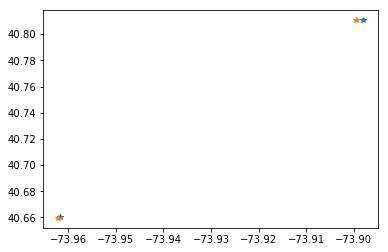

In [53]:
plt.plot(Center_train['X_KMean2'], Center_train['Y_KMean2'], '*')
plt.hold(True)
plt.plot(Center_test['X_KMean2'], Center_test['Y_KMean2'], '*')
plt.show()


Now we want to calculate the error between the center points. We make a error function

In [54]:
def error_cluster(Xtest, Ytest, Xtrain, Ytrain):
    error = []
    for i in range(0,len(Xtest)):
        e_x = abs(Xtest[i]-Xtrain[i])
        e_y = abs(Ytest[i]-Ytrain[i])
        error.append(e_x)
        error.append(e_y)
    return np.linalg.norm(error, np.inf)

In [55]:
def error_set(DataSet):
    x_train, x_test, y_train, y_test = train_test_split(DataSet['X'], DataSet['Y'], test_size = 0.2, random_state = 100)

    d_train = {'X': x_train, 'Y': y_train}
    d_test =  {'X': x_test, 'Y': y_test}

    df_train = pd.DataFrame(d_train)
    df_test = pd.DataFrame(d_test)


    Clustering_train= KMeanDataSet(df_train)
    kmeans_train = KMeanVector(df_train)
    Center_train = CenterLocation(kmeans_train)

    Clustering_test= KMeanDataSet(df_test)
    kmeans_test = KMeanVector(df_test)
    Center_test = CenterLocation(kmeans_test)

    Xtest = Center_test['X_KMean2'].dropna()
    Xtrain = Center_train['X_KMean2'].dropna()
    Ytest = Center_test['Y_KMean2'].dropna()
    Ytrain = Center_train['Y_KMean2'].dropna()
    error_KMean2 = error_cluster(Xtest, Ytest, Xtrain, Ytrain)

    Xtest = Center_test['X_KMean3'].dropna()
    Xtrain = Center_train['X_KMean3'].dropna()
    Ytest = Center_test['Y_KMean3'].dropna()
    Ytrain = Center_train['Y_KMean3'].dropna()
    error_KMean3 = error_cluster(Xtest, Ytest, Xtrain, Ytrain)

    Xtest = Center_test['X_KMean4'].dropna()
    Xtrain = Center_train['X_KMean4'].dropna()
    Ytest = Center_test['Y_KMean4'].dropna()
    Ytrain = Center_train['Y_KMean4'].dropna()
    error_KMean4 = error_cluster(Xtest, Ytest, Xtrain, Ytrain)

    Xtest = Center_test['X_KMean5'].dropna()
    Xtrain = Center_train['X_KMean5'].dropna()
    Ytest = Center_test['Y_KMean5'].dropna()
    Ytrain = Center_train['Y_KMean5'].dropna()
    error_KMean5 = error_cluster(Xtest, Ytest, Xtrain, Ytrain)

    Xtest = Center_test['X_KMean6'].dropna()
    Xtrain = Center_train['X_KMean6'].dropna()
    Ytest = Center_test['Y_KMean6'].dropna()
    Ytrain = Center_train['Y_KMean6'].dropna()
    error_KMean6 = error_cluster(Xtest, Ytest, Xtrain, Ytrain)
    
    print "Error K2: ", error_KMean2
    print "Error K3: ", error_KMean3
    print "Error K4: ", error_KMean4
    print "Error K5: ", error_KMean5
    print "Error K6: ", error_KMean6

    return [error_KMean2, error_KMean3, error_KMean4, error_KMean5, error_KMean6]    




In [56]:
Error_Bang = error_set(DataSet_cluster_Bang)

Error K2:  0.15087796513
Error K3:  0.170381538331
Error K4:  0.210773001702
Error K5:  0.221993740291
Error K6:  0.277780772839


In [57]:
Error_Musik = error_set(DataSet_cluster_Music)

Error K2:  0.151924006635
Error K3:  0.137066150262
Error K4:  0.156838145318
Error K5:  0.236042909652
Error K6:  0.326474080164


In [58]:
Error_Talk = error_set(DataSet_cluster_Talking)

Error K2:  0.00291372922356
Error K3:  0.00411205955797
Error K4:  0.144957656314
Error K5:  0.296409768003
Error K6:  0.169622504746


In [59]:
Error_TV = error_set(DataSet_cluster_TV)

Error K2:  0.00483358858274
Error K3:  0.133939660622
Error K4:  0.11596301525
Error K5:  0.021527434935
Error K6:  0.241370596733


C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\s161280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


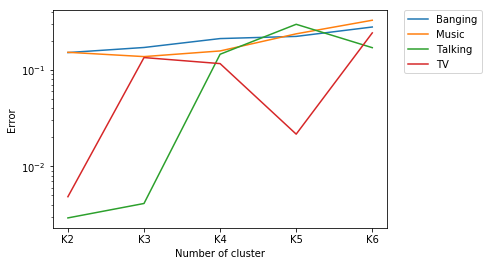

In [60]:
xKMean = ['K2', 'K3', 'K4', 'K5', 'K6']

x = [i  for i, _ in enumerate(xKMean)]

plt.semilogy(x, Error_Bang, label = "Banging")   
plt.hold(True)
plt.semilogy(x, Error_Musik, label = "Music")   
plt.hold(True)
plt.semilogy(x, Error_Talk, label = "Talking")   
plt.hold(True)
plt.semilogy(x, Error_TV, label = "TV")   
 
plt.xticks([i  for i, _ in enumerate(xKMean)],xKMean)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of cluster")
plt.ylabel("Error")
plt.show()

# 4. Visualizations
## Explain the visualization? and why they are right for the story? 
We chose to show our result in a map for both the Clustering and the KNN. 
For the clustering we show a map for each descriptor, four in total. Where the user can play around with different number of centers, varying from 1 to 6. This interactive way was chosen since we want to give the user the change to explore the result and see other maps for comparison. 
The KNN is shown in two maps, for both balanced and unbalanced data. There, the user can again explore the result by choosing for how many KN classifier they want to look at (3, 15 or 30). There was added an extra hovering feature to the map. This shows the average age, percentage of noise complaints and percentage of residents in each borough. 

## And why they are right for the story?
Since both machine learning tools were based on locations and maps, we consider the two maps the right visualization choice. The story we are telling is to inspect were the city is noisier, which the Clustering part will tell us more about, and to connect the age data to the noise complaints, and the KNN map provides us with that information. 


# 5. Discussion. Think critically about your creation. 
### What went well?
The machine learning implementation went well. The result can give us some ideas to where most of the noise can be located and tell us some things about each borough. 
From the K-mean Clustering we see that for the K = 2, 3 and 4 the center points lie almost exactly in the same location for all four maps. For the K = 5 we see finally some change. We notice that on Staten Island there was no center until we chose 5 centers, and that was only for half of the maps. By choosing K = 6 all maps get a centroids in Staten Island.

By looking at the result we conclude that Staten Island must be the quietest borough. This might not be a surprise since it is the borough with the fewest residents. The plot show in addition that the Banging/Talking and Loud Talking is the most in Manhattan and Brooklyn. To our surprise Loud Music/party is not necessary the most in the Manhattan area. It is pretty evenly distributed. 

There is also an interesting gap in the data. This is south of Queens were no noise complaints have been reported. We looked at a map of NYC to see if there is anything special there, and to our surprise we noticed that John F Kennedy airport is located there. Since we only have residential noise complaints, all complaints about noise pollution from the airport would not be listed here. This is none of the less probably not the reason for no noise complaints being listed in the area, since people still through parties and get complaints, even though they live nearby an airport. 

The KNN balanced data shows what we expected and was listed in the part about machine learning tool. There the unbalanced data shows that the largest categories, Loud music/Party (red), influences far more predictions. The balanced data show however which category is the most spread. By looking at K= 30 and only the land area, we seem to have the most prediction from Loud Television (yellow). This indicates that it is the most spread noise complaint. 
### What is still missing?  What could be improved?
The age data could be connected better to the noise complaints. We did not manage to explore the connection there like we would have wanted. 

We would have like to improve the lag of the webpage. For the K-mean clustering, this is quite problematic. The data is large since the points were many. We did some adjustments by deleting all duplicates that represented the same location and same color. We by doing so we managed to lower the complaints from 205,826 to 100,266, or by 49%. Even though we did this, the page lags considerably. 
